# Linear Regression: Demand Forecasting

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demand
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

##### Supressing warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

##### Importing necessary Python libraries            

In [2]:
# numpy & pandas
import numpy as np
import pandas as pd
from math import sqrt

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Machine learning Libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## 1. Reading & Understanding the data
       

### 1.1 Importing the data

In [3]:
bike = pd.read_csv("day.csv")

### 1.2 Inspecting the data

In [4]:
# Checking the top 5 rows of the dataframe
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Checking the shape of the dataframe 
bike.shape

(730, 16)

The dataframe has 730 rows and 16 columns
    
    

In [6]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
# How many types of each data type column exists and total memory usage
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values in the dataset.

In [8]:
#Checking the numerical columns data distribution statistics
bike.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,24-09-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


- Except one column which is date type, all other are either float or integer type.
- There are some fields that are categorical in nature, but are in integer/float type. Example : season, mnth, weathersit etc.
<br><br>We will have to analyze and decide whether to convert them to categorical or treat as integer. From Readme.txt file more information of these categorical columns can be inferred.



### 1.3 Duplicate Checking 

In [9]:
# Creating a copy of original dataframe for duplicate check
bike_dup = bike

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

The shape after running the drop duplicate command is same as the original dataframe. Hence we can conclude that there were not any duplicate values in the dataset.

### 1.4 Removing Redundant columns 

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Note:</b> 
            <p>
            Based on the high level analysis of the data and the data dictionary, the following variables can be removed from further analysis -
            </p>
        <ul>
            <li><b>instant</b>: It is only an index value </li>
            <li><b>dteday</b>: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column</li>
            <li><b>casual</b> & <b>registered</b>: Both these columns contains the count of bike booked by different categories of customers. We know that total bike rental count 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.</li>
        </ul>    
    </span>    
</div>

Based on the data dictionary, the following variables can be removed from further analysis -

- instant: It is only an index value
- dteday: This has the date, Since we already have separate columns for 'year' & 'month' we could live without this column
- casual & registered: Both these columns contains the count of bike booked by different categories of customers. Since we know that total bike rental count 'cnt = 'casual' + 'registered'. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [10]:
#dropping the unwanted columns

bike.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
bike.shape

(730, 12)

## 2. Decoding & Visualizing the data

### 2.1 Decoding Categorical columns 

Converting season, mnth,weathersit and weekday to categorical columns

- season: converting season values as per criteria - 1:Spring, 2:Summer, 3:Fall, 4:Winter
- mnth: converting mnth values as 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
- weathersit: converting weathersit values as 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
- weekday: converting weekday values as 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
- also converting yr, holiday and workingday

In [11]:
#Converting season
bike.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)
bike.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [12]:
#Converting mnth
bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.mnth.value_counts()

May    62
Aug    62
Dec    62
Jul    62
Mar    62
Oct    62
Jan    62
Apr    60
Nov    60
Sep    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [13]:
#Converting weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [14]:
#Converting weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts()

Monday       105
Tuesday      105
Saturday     104
Sunday       104
Friday       104
Thursday     104
Wednesday    104
Name: weekday, dtype: int64

In [15]:
#Converting yr
bike.yr.replace((0,1), ('2018','2019'), inplace=True)
bike.yr.value_counts()

2019    365
2018    365
Name: yr, dtype: int64

In [16]:
#Converting holiday
bike.holiday.replace((0,1), ('not_holiday','holiday'), inplace=True)
bike.holiday.value_counts()

not_holiday    709
holiday         21
Name: holiday, dtype: int64

In [17]:
#Converting workingday
bike.workingday.replace((0,1), ('not_workingday','workingday'), inplace=True)
bike.workingday.value_counts()

workingday        504
not_workingday    226
Name: workingday, dtype: int64

### 2.2 Categorical Variable Analysis 

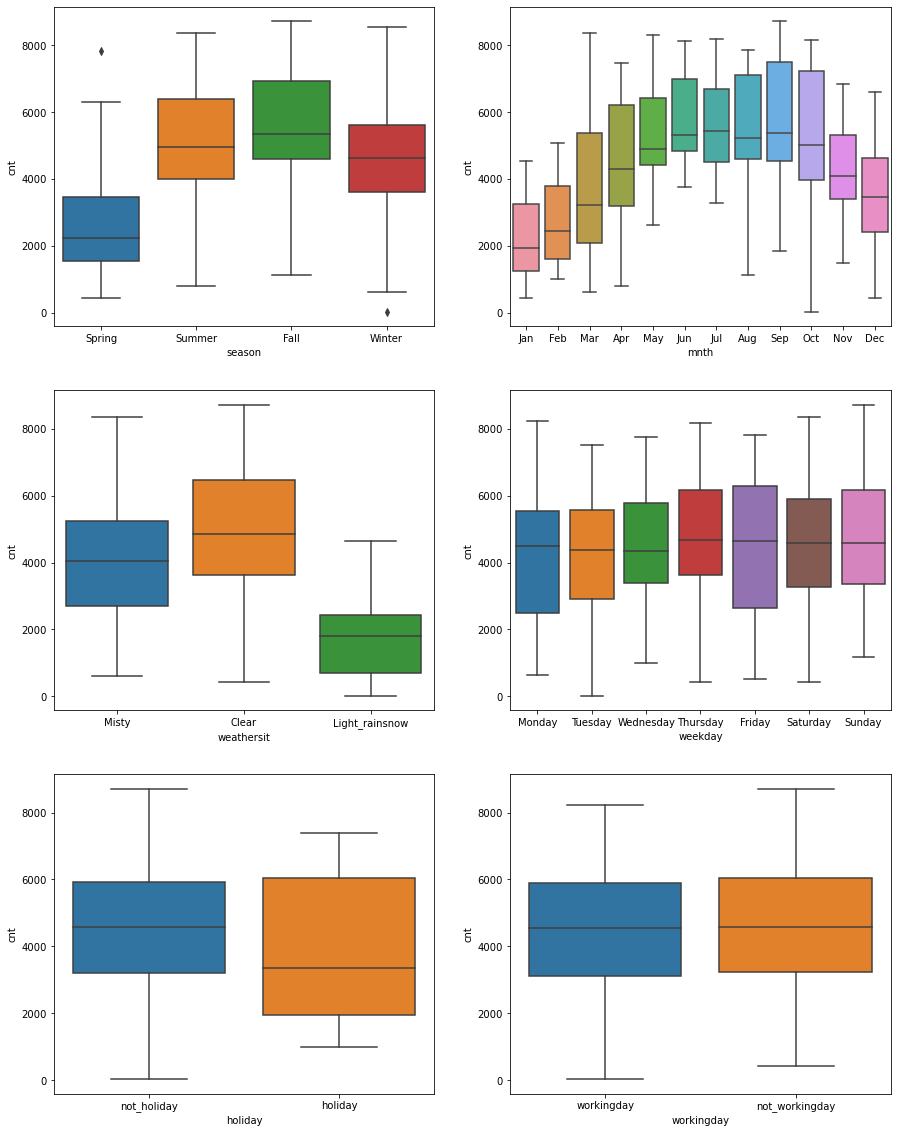

In [18]:
"""Build boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' 
to see how each of the predictor variable stackup against the target variable."""

plt.figure(figsize=(15,20))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(3,2,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(3,2,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(3,2,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(3,2,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

In [19]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_df = bike.groupby(col)['cnt'].agg(['sum', 'mean','median','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike.cnt.sum()*100
    cat_df['count_perc']=cat_df['count']/bike.cnt.count()*100
    return round(cat_df,2)

In [20]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=bike)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=bike, hue='yr',palette='Paired')
    return

#### 2.2.1 Season

In [21]:
categorical_stats('season')

,sum,mean,median,count,sum_perc,count_perc
season,,,,,,
Fall,1061129,5644.30,5353.5,188,32.24,25.75
Summer,918589,4992.33,4941.5,184,27.91,25.21
Winter,841613,4728.16,4634.5,178,25.57,24.38
Spring,469514,2608.41,2222.5,180,14.27,24.66


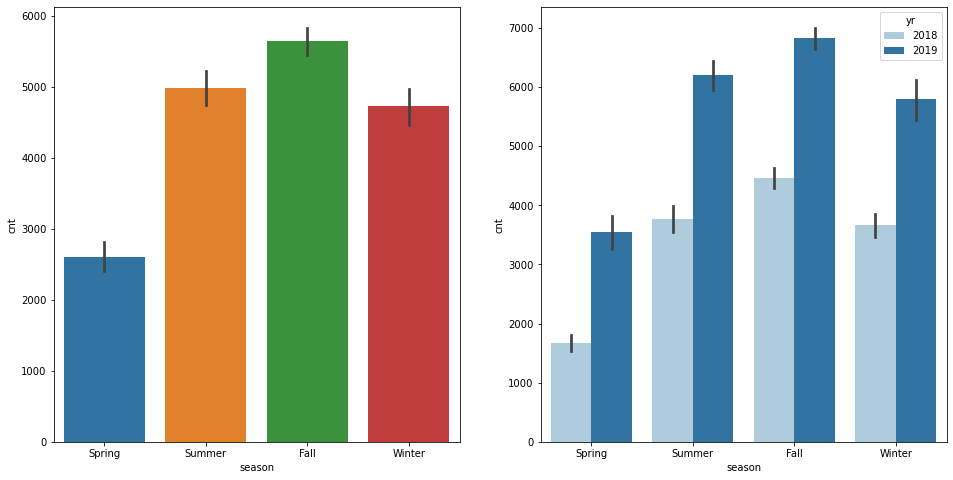

In [22]:
categorical_plot('season',16,8)

Almost 32% of the bike booking were happening in Fall with a median of over 5000 bookings (for two years). It is followed by Summer & Winter with 27% & 25% of total booking. It indicates that the season can be a good predictor of the dependent variable.

#### 2.2.2 Month

In [23]:
categorical_stats('mnth')

,sum,mean,median,count,sum_perc,count_perc
mnth,,,,,,
Aug,351194,5664.42,5229.5,62,10.67,8.49
Jun,346342,5772.37,5308.5,60,10.52,8.22
Sep,345991,5766.52,5384.0,60,10.51,8.22
Jul,344948,5563.68,5446.5,62,10.48,8.49
May,331686,5349.77,4890.5,62,10.08,8.49
Oct,322352,5199.23,5013.0,62,9.80,8.49
Apr,269094,4484.90,4293.5,60,8.18,8.22
Nov,254831,4247.18,4081.0,60,7.74,8.22
Mar,228920,3692.26,3216.5,62,6.96,8.49


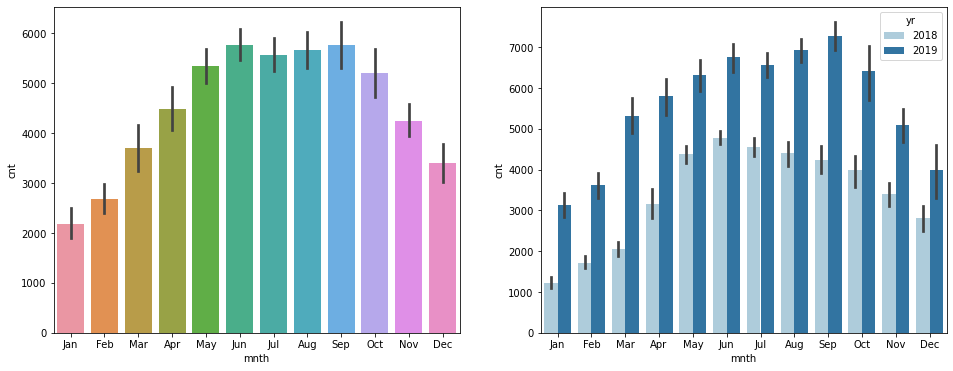

In [24]:
categorical_plot('mnth',16,6)

Almost 60% of the total bike bookings were happening in the months of May to Oct with a median of about 5000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

#### 2.2.3 Weather

In [25]:
categorical_stats('weathersit')

,sum,mean,median,count,sum_perc,count_perc
weathersit,,,,,,
Clear,2257952,4876.79,4844,463,68.61,63.42
Misty,995024,4044.81,4043,246,30.24,33.70
Light_rainsnow,37869,1803.29,1817,21,1.15,2.88


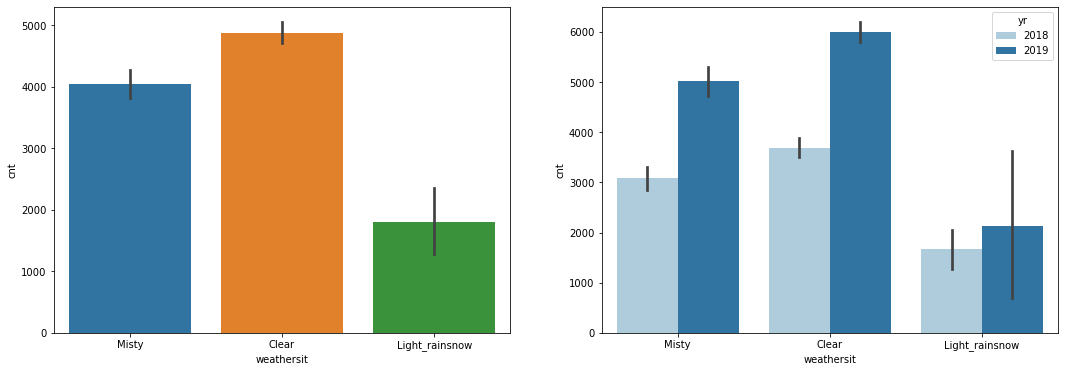

In [26]:
categorical_plot('weathersit',18,6)

Almost 68.6% of the bike booking was happening during Clear weather with a median of close to 5000 bookings (for two years). This was followed by Misty with 30% of the total booking. It indicates that the weathersit does show some trend towards the bike bookings, and it can be a good predictor for the dependent variable. As per the current data frame, no bookings were made during Heavy_rainsnow weather.

#### 2.2.4 Weekday

In [27]:
categorical_stats('weekday')

,sum,mean,median,count,sum_perc,count_perc
weekday,,,,,,
Thursday,487923,4691.57,4676.0,104,14.83,14.25
Sunday,485235,4665.72,4590.5,104,14.74,14.25
Saturday,481176,4626.69,4572.0,104,14.62,14.25
Friday,478132,4597.42,4642.5,104,14.53,14.25
Wednesday,462276,4444.96,4350.0,104,14.05,14.25
Tuesday,448822,4274.50,4381.0,105,13.64,14.38
Monday,447281,4259.82,4511.0,105,13.59,14.38


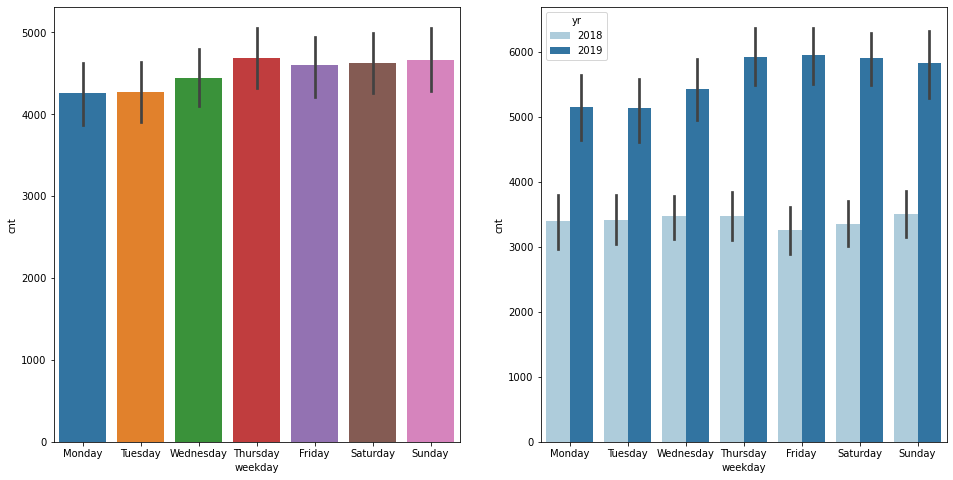

In [28]:
categorical_plot('weekday',16,8)

'weekday' variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection.

#### 2.2.5 Holiday : 

In [29]:
categorical_stats('holiday')

,sum,mean,median,count,sum_perc,count_perc
holiday,,,,,,
not_holiday,3212410,4530.9,4563,709,97.62,97.12
holiday,78435,3735.0,3351,21,2.38,2.88


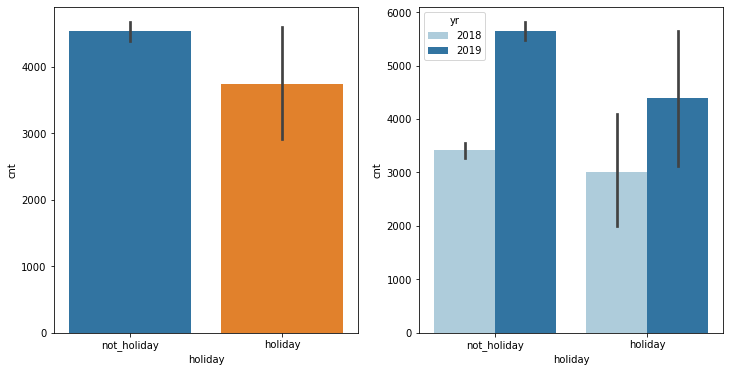

In [30]:
categorical_plot('holiday',12,6)

Only 2% of the bike rentals are happening on the holidays.

#### 2.2.6 Working Day

In [31]:
categorical_stats('workingday')

,sum,mean,median,count,sum_perc,count_perc
workingday,,,,,,
workingday,2253988,4472.20,4544.5,504,68.49,69.04
not_workingday,1036857,4587.86,4572.0,226,31.51,30.96


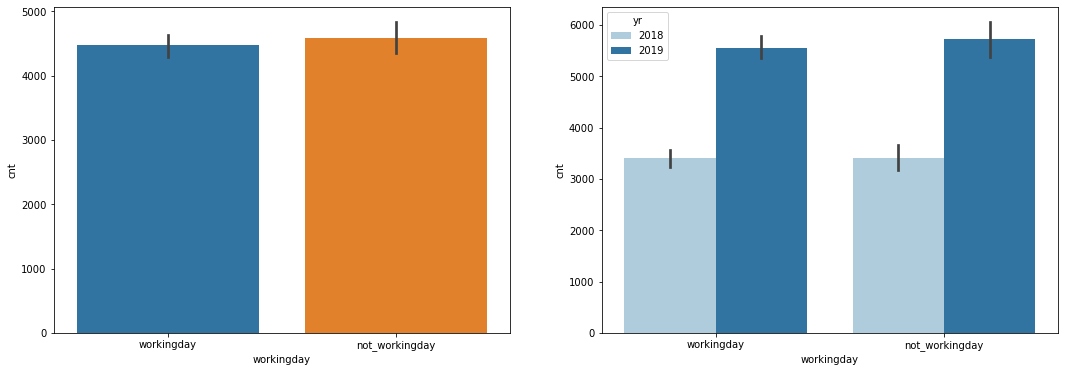

In [32]:
categorical_plot('workingday',18,6)

Almost 69% of the bike booking were happening on a working day with a median of close to 5000 bookings (for two years). It indicates that the workingday can be a good predictor of the dependent variable.

#### 2.2.7 Year : 

In [33]:
categorical_stats('yr')

,sum,mean,median,count,sum_perc,count_perc
yr,,,,,,
2019,2047742,5610.25,5936,365,62.23,50.0
2018,1243103,3405.76,3740,365,37.77,50.0


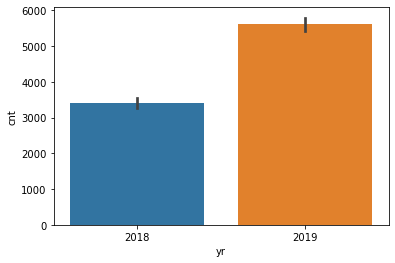

In [34]:
sns.barplot('yr','cnt',data=bike)
plt.show()

Bike rental demand has gone up from 2018 to 2019.

### 2.3 Numerical Variable Analysis and Treatment

In [35]:
bike.describe().columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

#### 2.3.1 Distplots

Distribution plot for temp


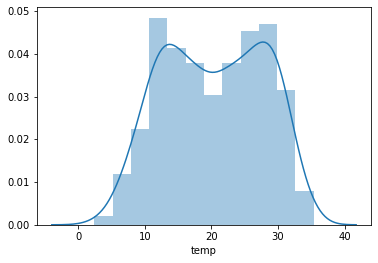

Distribution plot for atemp


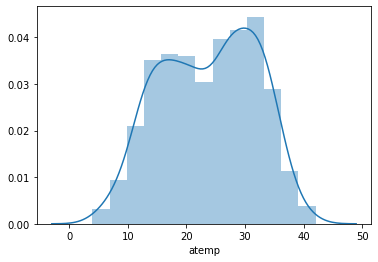

Distribution plot for hum


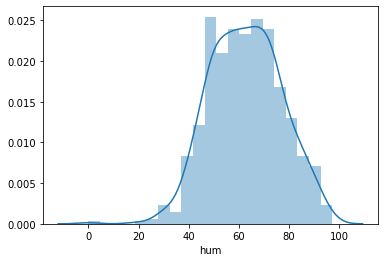

Distribution plot for windspeed


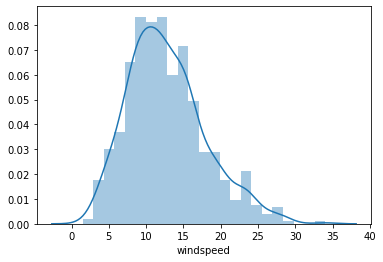

Distribution plot for cnt


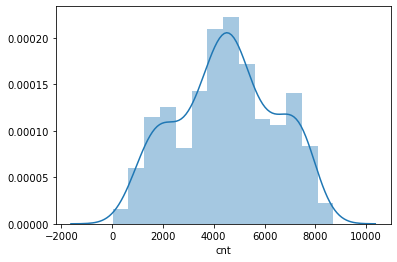

In [36]:
x = list(bike.describe().columns)

for i in x:
    print("===================================================")
    print('Distribution plot for', i)
    sns.distplot(bike[i])
    plt.show()

All the numerical variables seem to have normal distribution which is helpful for Linear Regression.

#### 2.3.2 Pairplot

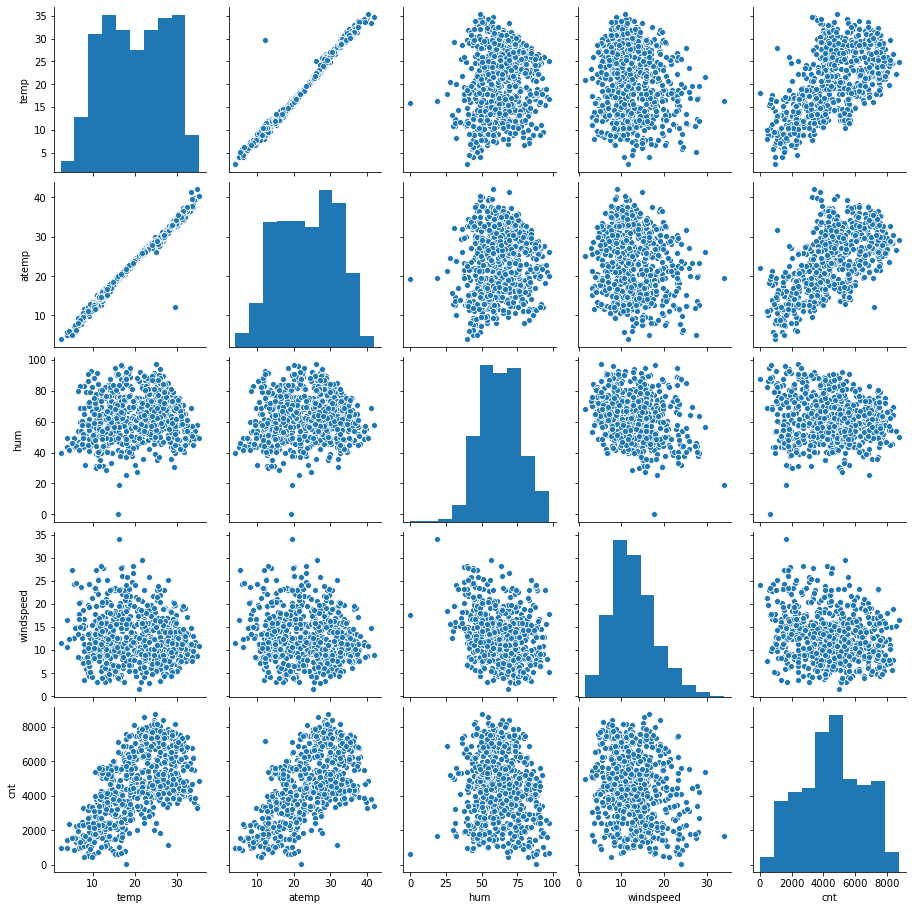

In [37]:
#Generating pairplot to check the relationships between numeric variables.
bike_num = bike[['temp','atemp','hum','windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

#### 2.3.3 Correlation coefficients

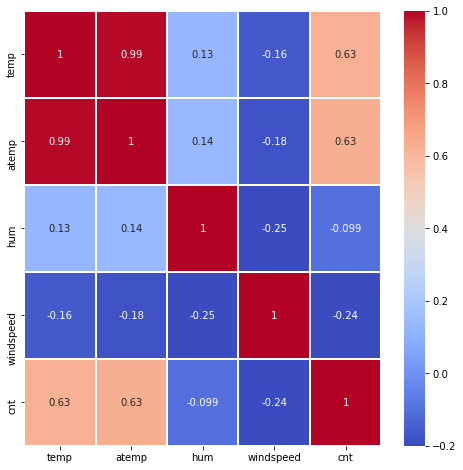

In [38]:
# Checking correlation of the parameters by mapping a correlation heatmap

plt.figure(figsize = (8,8))
ax= sns.heatmap(bike_num.corr(), annot = True, cmap="coolwarm",linewidth =1,vmin=-0.2, vmax=1)

There is linear relationship and a very high correlation coefficient between temp and atemp. Both of the parameters cannot be used in the model due to issue of multicollinearity.

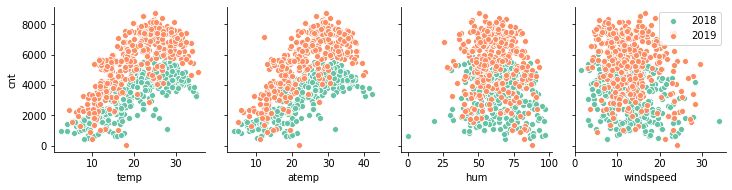

In [39]:
# Checking the impact of year against the numerical variable.

ax = sns.pairplot(x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , data=bike, hue='yr', palette='Set2')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

All the parameters have increased counts in 2019 compared to 2018 but still follow a specific pattern similar to the previous year. Thus, year may become a key parameter in the model while gauging demand.

#### 2.3.4 Dropping atemp

In [40]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [41]:
bike.drop(['atemp'],axis=1,inplace=True)

In [42]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

#### 2.3.5 Handling Outliers

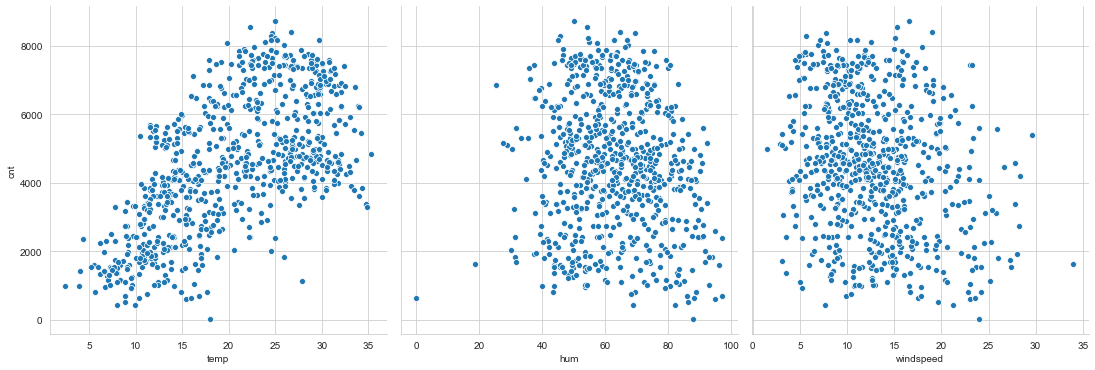

In [43]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=bike,x_vars=['temp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1)
plt.show()

- temp vs cnt has outliers between 15 and 30
- hum vs cnt has outliers below 20 
- windspeed vs cnt has outliers above 30

In [44]:
## Dropping outliers in continuous variables
# outliers in temp
bike = bike.drop(index = bike[(bike['temp'] > 15) & (bike['temp'] < 20) & (bike['cnt'] < 100)].index)
bike = bike.drop(index = bike[(bike['temp'] > 25) & (bike['temp'] < 30) & (bike['cnt'] < 2000)].index)

#outliers in hum
bike = bike.drop(index = bike[(bike['hum'] < 20)].index)

#outliers in windspeed
bike = bike.drop(index = bike[(bike['windspeed'] > 30)].index)


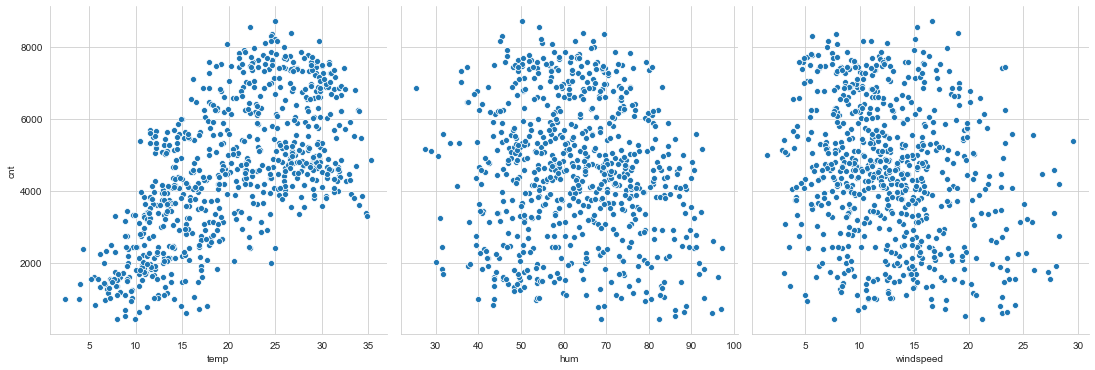

In [45]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=bike,x_vars=['temp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1)
plt.show()

Outliers have been handled.

## 3. Data Preparation

### 3.1 Dummy Variable Creation 

#### Season

In [46]:
season = pd.get_dummies(bike['season'], drop_first = True)
season.head(3)

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0


#### Weather

In [47]:
weather = pd.get_dummies(bike['weathersit'], drop_first = True)
weather.head(3)

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0


#### Month

In [48]:
month = pd.get_dummies(bike['mnth'], drop_first = True)
month.head(3)

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0


#### Weekday

In [49]:
weekday = pd.get_dummies(bike['weekday'], drop_first = True)
weekday.head(3)

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1


#### Year

In [50]:
#Converting yr
bike.yr.replace(('2018','2019'), (0,1), inplace=True)
bike.yr.value_counts()

1    364
0    361
Name: yr, dtype: int64

#### workingday

In [51]:
#Converting workingday
bike.workingday.replace(('not_workingday','workingday'), (0,1), inplace=True)
bike.workingday.value_counts()

1    501
0    224
Name: workingday, dtype: int64

#### holiday

In [52]:
#Converting holiday
bike.holiday.replace(('not_holiday','holiday'), (0,1), inplace=True)
bike.holiday.value_counts()

0    704
1     21
Name: holiday, dtype: int64

### 3.2 Merging the dataframes

In [53]:
# Creating a new dataframe called bike_new where season, month, weather and weekday dataframe is being added
bike_new = pd.concat([bike,season,month,weather,weekday], axis = 1)
bike_new.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Spring,0,Jan,0,Monday,1,Misty,14.110847,80.5833,10.749882,...,0,0,0,1,1,0,0,0,0,0
1,Spring,0,Jan,0,Tuesday,1,Misty,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wednesday,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,0,0,1


In [54]:
bike_new.shape

(725, 33)

In [55]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          725 non-null    object 
 1   yr              725 non-null    int64  
 2   mnth            725 non-null    object 
 3   holiday         725 non-null    int64  
 4   weekday         725 non-null    object 
 5   workingday      725 non-null    int64  
 6   weathersit      725 non-null    object 
 7   temp            725 non-null    float64
 8   hum             725 non-null    float64
 9   windspeed       725 non-null    float64
 10  cnt             725 non-null    int64  
 11  Spring          725 non-null    uint8  
 12  Summer          725 non-null    uint8  
 13  Winter          725 non-null    uint8  
 14  Aug             725 non-null    uint8  
 15  Dec             725 non-null    uint8  
 16  Feb             725 non-null    uint8  
 17  Jan             725 non-null    uin

### 3.3 Removing unnecessary columns

In [56]:
"""
deleting the unnecessry column season, mnth, weathersit and weekday as the respective values are already populated as 
binary columns data.
"""

bike_new.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
bike_new.shape

(725, 29)

In [57]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              725 non-null    int64  
 1   holiday         725 non-null    int64  
 2   workingday      725 non-null    int64  
 3   temp            725 non-null    float64
 4   hum             725 non-null    float64
 5   windspeed       725 non-null    float64
 6   cnt             725 non-null    int64  
 7   Spring          725 non-null    uint8  
 8   Summer          725 non-null    uint8  
 9   Winter          725 non-null    uint8  
 10  Aug             725 non-null    uint8  
 11  Dec             725 non-null    uint8  
 12  Feb             725 non-null    uint8  
 13  Jan             725 non-null    uint8  
 14  Jul             725 non-null    uint8  
 15  Jun             725 non-null    uint8  
 16  Mar             725 non-null    uint8  
 17  May             725 non-null    uin

All the columns are now as numeric value. The dataframe is ready for splitting into Train & Test dataframes.

## 4. Splitting the data into Train & Test Dataset

### 4.1. Train & Test split 

In [58]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, random_state = 333)

<span style='font-family:Georgia'>
    <p> Verifying the train - test split and new dataframe details </p>
</span>

In [59]:
bike_train.shape

(507, 29)

In [60]:
bike_test.shape

(218, 29)

Based on the 70% - 30% split between train and test dataset we have 510 rows in train dataset and 220 in test dataset.

### 4.2 Rescaling bike_train dataframe

In [61]:
# Rescaling using MinMaxCcaler
scaler = MinMaxScaler()

In [62]:
#Dataframe before scaling 
bike_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
675,1,0,1,12.129153,54.7500,20.375236,5035,0,0,1,...,0,0,0,1,0,0,0,1,0,0
534,1,0,1,28.221653,69.0000,9.917139,6825,0,1,0,...,0,0,0,0,0,0,0,0,0,1
38,0,0,1,9.054153,53.7917,24.250650,1530,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [63]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp','hum','windspeed','cnt']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [64]:
#Checking after rescalling

bike_train.head(3)

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
675,1,0,1,0.294943,0.409540,0.704496,0.555837,0,0,1,...,0,0,0,1,0,0,0,1,0,0
534,1,0,1,0.784017,0.608493,0.314155,0.771943,0,1,0,...,0,0,0,0,0,0,0,0,0,1
38,0,0,1,0.201489,0.396161,0.849143,0.132681,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### 4.3 Checking Correlation coefficient

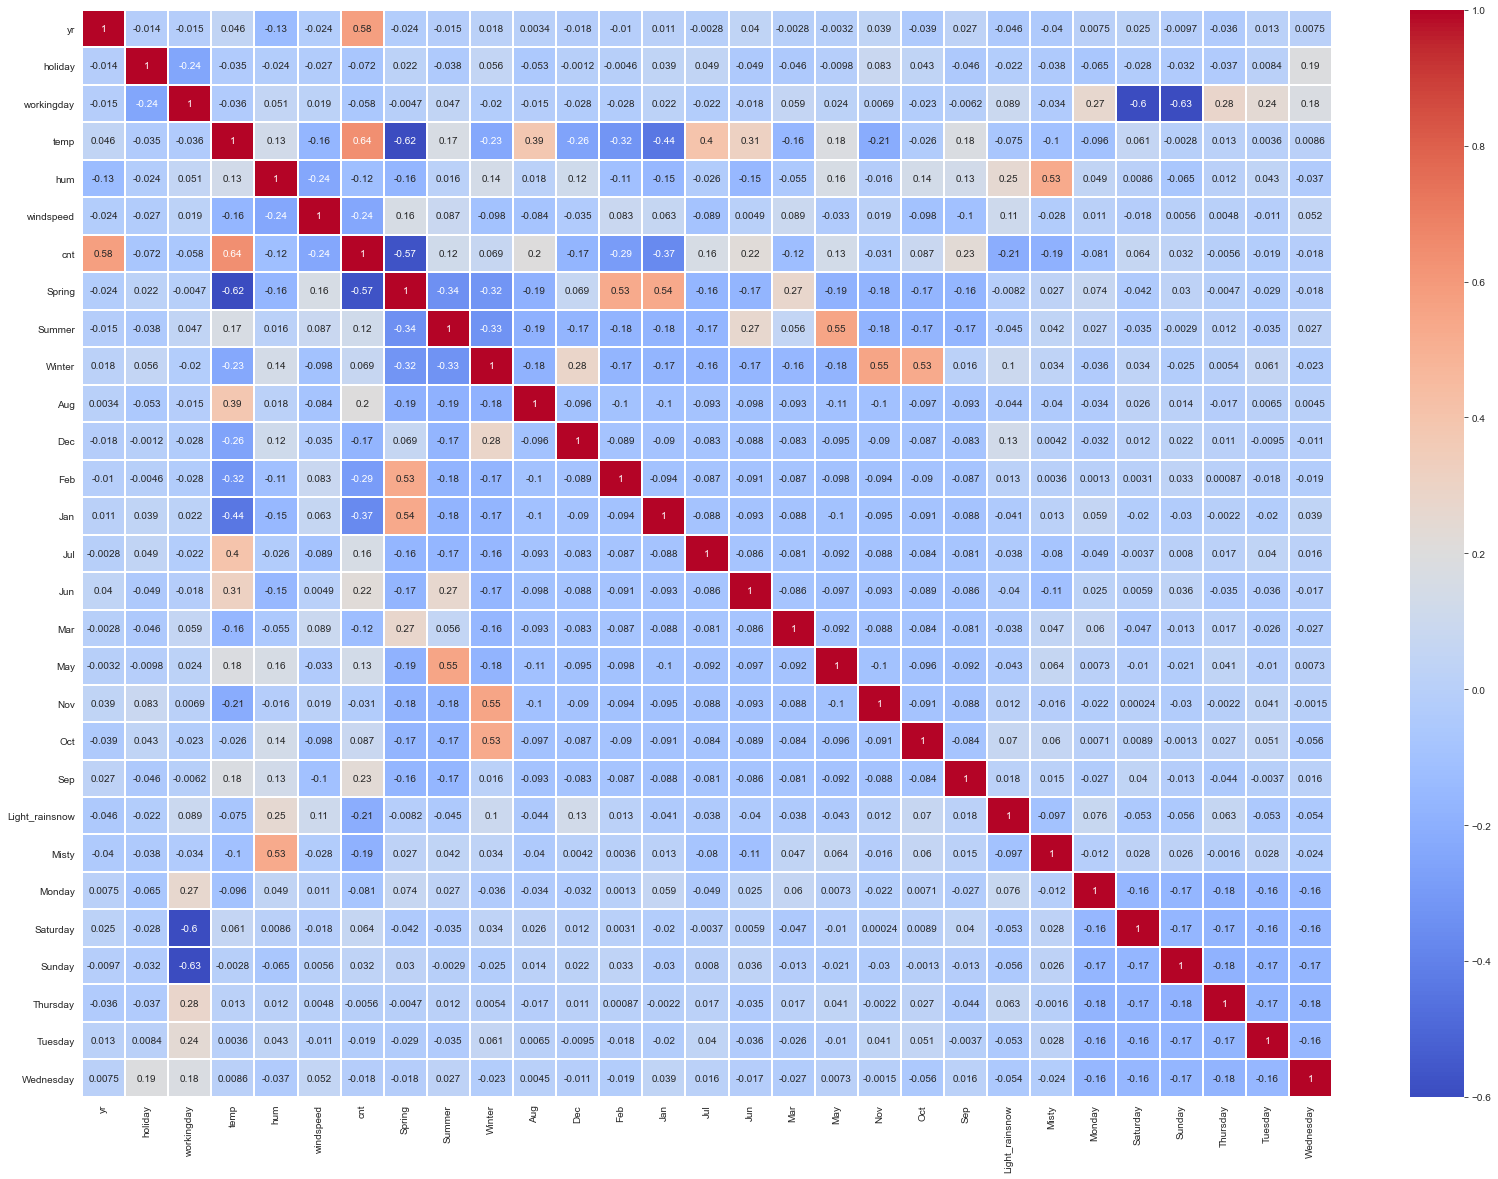

In [65]:
plt.figure(figsize = (28,20))
ax= sns.heatmap(bike_train.corr(), annot = True, cmap="coolwarm",linewidth =1,vmin=-0.6, vmax=1)
plt.show()

There is multi-colinearity between the variables. We need to consider the factors when developing the model.

- workingday variable has high negative correlation with Sat & Sun (where workingday =0)
- Spring is negatively correlated with cnt
- temp and yr have strong correlation with cnt
- misty weather and humidity have correlation
- various months and corresponding weather have correlation

## 5. Building the Linear Model 

### 5.1 Dividing into X_train and y_train 

In [66]:
y_train = bike_train.pop('cnt')
X_train = bike_train

In [67]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Spring',
       'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Light_rainsnow', 'Misty', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### 5.2 RFE 
<br>
Recursive Feature Elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE.

In [68]:
# Selecting 15 Features using RFE 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lr_estimator = LinearRegression()
rfe = RFE(lr_estimator,n_features_to_select=15, step=1)
selector = rfe.fit(X_train,y_train)

In [69]:
# RFE Feature Ranking
rfe_ranking = pd.DataFrame({'rank' : selector.ranking_, 'support': selector.support_, 'features' : X_train.columns}).sort_values(by='rank',ascending=True)
rfe_ranking

,rank,support,features
0,1,True,yr
24,1,True,Sunday
23,1,True,Saturday
20,1,True,Light_rainsnow
19,1,True,Sep
17,1,True,Nov
12,1,True,Jan
8,1,True,Winter
13,1,True,Jul
6,1,True,Spring


In [70]:
# Selected Features
selected_features = rfe_ranking.loc[rfe_ranking['rank'] == 1,'features'].values
selected_features

array(['yr', 'Sunday', 'Saturday', 'Light_rainsnow', 'Sep', 'Nov', 'Jan',
       'Winter', 'Jul', 'Spring', 'holiday', 'workingday', 'windspeed',
       'hum', 'temp'], dtype=object)

In [71]:
# checking which columns have been eliminated 
X_train.columns[~selector.support_]

Index(['Summer', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Misty',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [72]:
# Following a stepwise elimination
import statsmodels.api as sm
def ols_fit(y,X) : 
    X_train_sm = sm.add_constant(X)
    model = sm.OLS(y,X_train_sm).fit()
    print(model.summary())
    return model
def vif(X) : 
    df = sm.add_constant(X)
    vif = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif_frame = pd.DataFrame({'vif' : vif[0:]},index = df.columns).reset_index()
    print(vif_frame.sort_values(by='vif',ascending=False))

#### 5.2.1 Model 1

In [73]:
features_1 = selected_features
ols_fit(y_train,X_train[features_1])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     180.6
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          1.01e-188
Time:                        15:09:51   Log-Likelihood:                 495.29
No. Observations:                 507   AIC:                            -958.6
Df Residuals:                     491   BIC:                            -890.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3831      0.079      4.

#### 5.2.2 Model 2
- Dropping 'Sunday' because of high p-value and high VIF.

In [74]:
del_feature = 'Sunday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     193.5
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          1.08e-189
Time:                        15:09:51   Log-Likelihood:                 494.86
No. Observations:                 507   AIC:                            -959.7
Df Residuals:                     492   BIC:                            -896.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3165      0.030     10.

#### 5.2.3 Model 3
- Dropping 'Saturday' because of high p-value.

In [75]:
del_feature = 'Saturday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     207.9
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          1.70e-190
Time:                        15:09:51   Log-Likelihood:                 494.00
No. Observations:                 507   AIC:                            -960.0
Df Residuals:                     493   BIC:                            -900.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3089      0.030     10.

#### 5.2.4 Model 4
- Dropping 'workingday' because of high p-value.

In [76]:
del_feature = 'workingday'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     225.0
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          2.05e-191
Time:                        15:09:51   Log-Likelihood:                 493.37
No. Observations:                 507   AIC:                            -960.7
Df Residuals:                     494   BIC:                            -905.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3006      0.029     10.

#### 5.2.5 Model 5
- Dropping 'Jan' because this information might also be contained in 'Winter'.

In [77]:
del_feature = 'Jan'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     242.7
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          2.12e-191
Time:                        15:09:51   Log-Likelihood:                 490.48
No. Observations:                 507   AIC:                            -957.0
Df Residuals:                     495   BIC:                            -906.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2871      0.028     10.

#### 5.2.6 Model 6
- Dropping 'Nov' because this information might also be contained in 'Winter'.

In [78]:
del_feature = 'Nov'
selected_features = selected_features[selected_features!=del_feature]
ols_fit(y_train,X_train[selected_features])
vif(X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          4.90e-191
Time:                        15:09:51   Log-Likelihood:                 486.73
No. Observations:                 507   AIC:                            -951.5
Df Residuals:                     496   BIC:                            -904.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2783      0.028      9.

This model looks good, as there seems to be low multicollinearity (below 3) between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model.

## 6. Final Model

##### Multicollinearity

In [79]:
vif(X_train[selected_features])

             index        vif
0            const  46.462834
10            temp   2.908847
6           Spring   2.638630
4           Winter   1.753825
5              Jul   1.262996
9              hum   1.237185
8        windspeed   1.142933
2   Light_rainsnow   1.121260
3              Sep   1.080605
1               yr   1.030797
7          holiday   1.012973


VIF < 3 for selected features. No significant multicollinearity observed. Similar indicating comparison of R-squared and adjusted R-squared.

##### Model summary

In [80]:
final_model = ols_fit(y_train,X_train[selected_features])

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     262.8
Date:                Tue, 20 Apr 2021   Prob (F-statistic):          4.90e-191
Time:                        15:09:52   Log-Likelihood:                 486.73
No. Observations:                 507   AIC:                            -951.5
Df Residuals:                     496   BIC:                            -904.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2783      0.028      9.

- 10 features have been selected.
- All the features are statistically significant [low p-value]
- The model over is a good fit with Prob (F-statistic): 4.90e-191
- The model explains 84.1% variability in the training data. Adjusted R-square being 83.8%

## 7. Residual Analysis

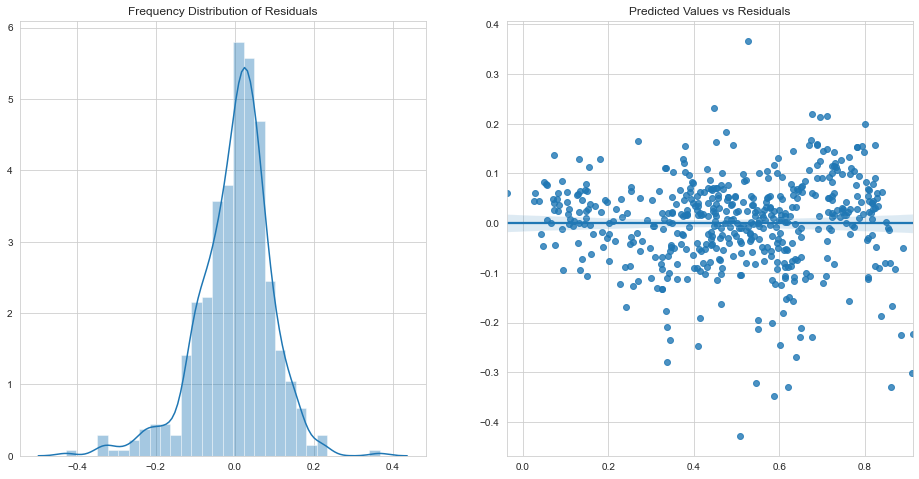

In [81]:
# Residual Analysis of Trained Data
X_train_sm = sm.add_constant(X_train[selected_features])

y_train_pred = final_model.predict(X_train_sm)
fig,ax = plt.subplots(1,2)
fig.set_figheight(8)
fig.set_figwidth(16)

ax[0].set(title='Frequency Distribution of Residuals')
sns.distplot(y_train-y_train_pred, bins=30, ax=ax[0])

ax[1].set(title='Predicted Values vs Residuals')

sns.regplot(y_train_pred,y_train-y_train_pred,ax=ax[1])
plt.show()

- Residual errors follow a normal distribution with mean almost equal to 0
- Variance of Errors doesnt follow any trends. Errors exhibit homoscedasticity. 
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

##### Mean of Residuals

In [82]:
# Mean of Residuals
(y_train-y_train_pred).mean()

-5.446552698222723e-16

The mean value of residuals is almost equal to zero.

##### Normanlity of Residuals

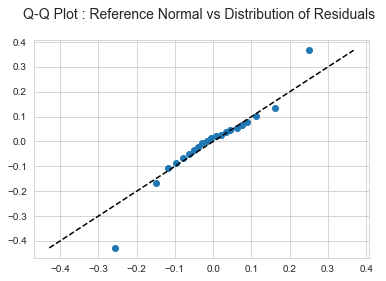

In [83]:
# Verifying the normality of distribution of residuals 
mean = (y_train-y_train_pred).mean()
std = (y_train-y_train_pred).std()

ref_normal = np.random.normal(mean,std,(y_train-y_train_pred).shape[0])


percs = np.linspace(0,100,21)
qn_ref_normal = np.percentile(ref_normal, percs)
qn_residual = np.percentile(y_train - y_train_pred , percs)

plt.plot(qn_ref_normal,qn_residual, ls="", marker="o")

x = np.linspace(np.min((qn_ref_normal.min(),qn_residual.min())), np.max((qn_ref_normal.max(),qn_residual.max())))
m = plt.plot(x,x, color="k", ls="--")
plt.title('Q-Q Plot : Reference Normal vs Distribution of Residuals \n', fontsize=14)
plt.savefig('q-q-plot.png')
plt.show()

- This plot further shows that the residual distribution is approximately normal for all test data with values within range of training data.

##### Randomness of Residuals

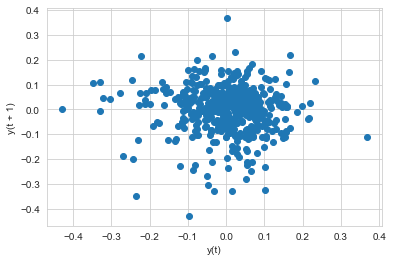

In [84]:
# lag plot to assess independence of data points
from pandas.plotting import lag_plot
lag_plot(y_train-y_train_pred)
plt.show()

- Lagplot of residuals shows no trend. Hence the error terms have constant variance
###### Hence, assumptions of Linear Regression are satisfied by this model.

## 8. Testing the model

### 8.1 Rescaling bike_test dataframe

In [85]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 530 to 577
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              218 non-null    int64  
 1   holiday         218 non-null    int64  
 2   workingday      218 non-null    int64  
 3   temp            218 non-null    float64
 4   hum             218 non-null    float64
 5   windspeed       218 non-null    float64
 6   cnt             218 non-null    int64  
 7   Spring          218 non-null    uint8  
 8   Summer          218 non-null    uint8  
 9   Winter          218 non-null    uint8  
 10  Aug             218 non-null    uint8  
 11  Dec             218 non-null    uint8  
 12  Feb             218 non-null    uint8  
 13  Jan             218 non-null    uint8  
 14  Jul             218 non-null    uint8  
 15  Jun             218 non-null    uint8  
 16  Mar             218 non-null    uint8  
 17  May             218 non-null    u

In [86]:
selected_features

array(['yr', 'Light_rainsnow', 'Sep', 'Winter', 'Jul', 'Spring',
       'holiday', 'windspeed', 'hum', 'temp'], dtype=object)

In [87]:
num_vars = ['temp', 'hum', 'windspeed','cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 530 to 577
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              218 non-null    int64  
 1   holiday         218 non-null    int64  
 2   workingday      218 non-null    int64  
 3   temp            218 non-null    float64
 4   hum             218 non-null    float64
 5   windspeed       218 non-null    float64
 6   cnt             218 non-null    float64
 7   Spring          218 non-null    uint8  
 8   Summer          218 non-null    uint8  
 9   Winter          218 non-null    uint8  
 10  Aug             218 non-null    uint8  
 11  Dec             218 non-null    uint8  
 12  Feb             218 non-null    uint8  
 13  Jan             218 non-null    uint8  
 14  Jul             218 non-null    uint8  
 15  Jun             218 non-null    uint8  
 16  Mar             218 non-null    uint8  
 17  May             218 non-null    u

### 8.2 Creating X_test and y_test sets

In [88]:
y_test = bike_test.pop('cnt')
X_test = bike_test

### 8.3 Subsetting X_test set for selected variables

In [89]:
X_train[selected_features]

,yr,Light_rainsnow,Sep,Winter,Jul,Spring,holiday,windspeed,hum,temp
675,1,0,0,1,0,0,0,0.704496,0.409540,0.294943
534,1,0,0,0,0,0,0,0.314155,0.608493,0.784017
38,0,0,0,0,0,1,0,0.849143,0.396161,0.201489
360,0,0,0,0,0,1,0,0.415267,0.709714,0.331287
240,0,0,0,0,0,0,0,0.343684,0.419429,0.719639
...,...,...,...,...,...,...,...,...,...,...
448,1,0,0,0,0,0,0,0.496103,0.874926,0.471467
46,0,0,0,0,0,1,0,0.573666,0.236385,0.322889
378,1,0,0,0,0,1,0,0.412098,0.283886,0.150609
370,1,0,0,0,0,1,0,0.363897,0.401977,0.342709


In [90]:
X_train_new=X_train[selected_features]

In [91]:
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

### 8.4 Predicting

In [92]:
y_test_pred = final_model.predict(X_test_new)

## 9. Model Evaluation

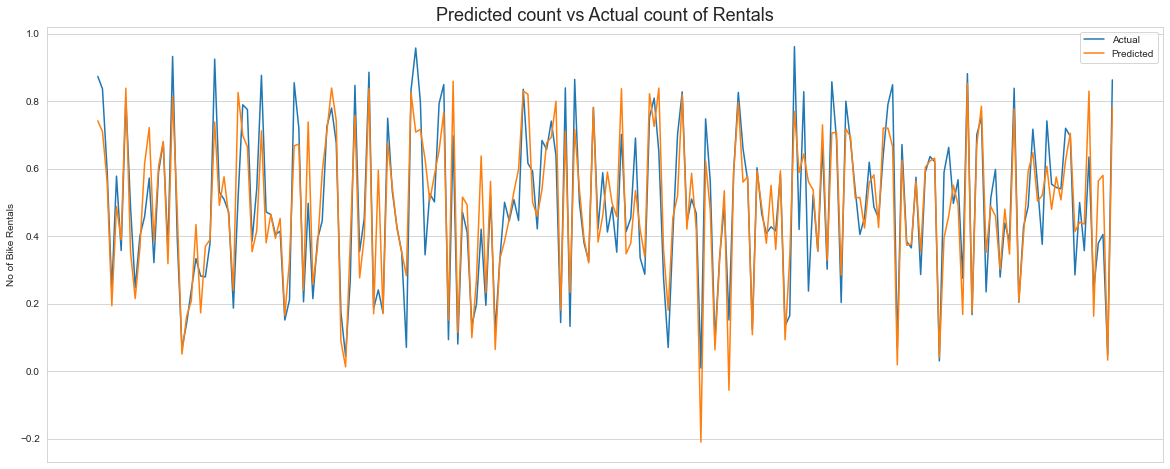

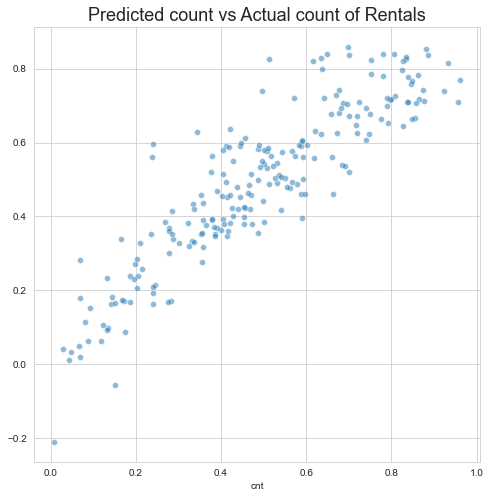

In [93]:
# Plotting Actual vs Predicted No of rentals 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted count vs Actual count of Rentals', fontsize= 18)
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

plt.figure(figsize=[8,8])
sns.scatterplot(y_test,y_test_pred, alpha=0.5)
plt.title('Predicted count vs Actual count of Rentals', fontsize= 18)
plt.show()

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

### 9.1 R<sup>2</sup> value & Mean Squared Error calculation

In [94]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_test_pred)
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)

print('R-squared for train data:',round(rsquared_train,2))
print('R-squared for test data:',round(rsquared_test,2))
print('Mean Squared Error = ',round(mse,3))

R-squared for train data: 0.84
R-squared for test data: 0.8
Mean Squared Error =  0.011


### 9.2 Adjusted R<sup>2</sup> value calculation for bike_test dataframe
<br>
</span>
<span style="font-size:18" >
    <span style ='font-family:Arial'>
        <font color = blue > 
      <math> R<sup>2</sup><sub>adj</sub>=1−</math>
        <span style="display: inline-block;vertical-align: middle;">
    <div style="text-align: center;border-bottom: 1px solid black;">(1-R<sup>2</sup>) x (n-1)</div>
     <div style="text-align: center;">(n-p-1)</div> 
        </span>
        </font>
</span>
</span>

In [95]:
# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-rsquared_test)*(n-1)/(n-p-1),2)
adjusted_r2

0.77

#### Model Train & Test R<sup>2</sup> statsitics comparison
<br>
<table>
    <thead>
    <tr><th>Measurement</th><th>Train Dataset</th><th>Test Dataset</th></tr>
    </thead>
    <tbody>
        <tr><td>R2 Value</td><td>84.4%</td><td>80%</td></tr>
        <tr><td>Adjusted R2 Value</td><td>84%</td><td>77%</td></tr>
    </tbody>
</table><br>
    <p> It seems to be really a good model that can generalize various datasets. </p>
</span>

### 9.3 Root Mean Squared Error

In [96]:
RMSE = round(sqrt(mean_squared_error(y_test, y_test_pred)),4)
RMSE

0.1031

### 9.4 Mean Absolute Error

In [97]:
MAE = round(mean_absolute_error(y_test, y_test_pred),2)
MAE

0.08

### 9.5 F-Statistic

F-Statistic is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.<br>
F-Statistics for our model is 262.8. Which shows that our model has high significance.

## 10. Model Stability 

In [98]:
# R-square using cross validation

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
clr = cross_val_score(lr,X_train[selected_features],y_train,cv=10, scoring='r2')
clr

array([0.82786249, 0.87246821, 0.76884026, 0.79162793, 0.84617539,
       0.70640327, 0.87291316, 0.89485419, 0.90736225, 0.79961466])

In [99]:
print("R-square at 0.95 confidence level : %0.2f (+/- %0.2f)" % (clr.mean(), clr.std() * 2))

R-square at 0.95 confidence level : 0.83 (+/- 0.12)


## 11. Top Predictor Variables

In [100]:
# standardizing numerical variables 

from sklearn.preprocessing import StandardScaler
reg_features = selected_features
scaler = StandardScaler()
data = X_train[selected_features]
std_num = scaler.fit(data[['temp','windspeed','hum']])


std_X_train = pd.DataFrame(data = scaler.transform(data[['temp','windspeed','hum']]), columns=['temp','windspeed','hum'])
for i in reg_features : 
    std_X_train[i] = data[i].values


reshaped_y_train = y_train.values.reshape(-1,1)

# Fitting linear regression model 
std_model = lr.fit(std_X_train, reshaped_y_train)

# Coefficients and intercept
result = pd.DataFrame(data = std_model.coef_, columns = std_X_train.columns, index=['MLR Coefficients']).T
result = result.sort_values(by='MLR Coefficients',ascending=False)
print('\nIntercept :',std_model.intercept_)
result


Intercept : [0.27832211]


,MLR Coefficients
temp,0.544830
yr,0.236411
Sep,0.082099
Winter,0.072644
Jul,-0.066298
holiday,-0.075810
Spring,-0.105201
windspeed,-0.163061
Light_rainsnow,-0.191627
hum,-0.221973


* Upon standardized the values of predictor variables, the above shows that the top features influencing demand are ```temp```, followed by ```yr``` and ```hum```.

<span style='font-family:Arial'>
    <font color = black>
        <h3> Hypothesis Testing : </h3>
    </font>
    <p> Hypothesis Testing states that,<br>
        <blockquote>
            H0:B1=B2=...=Bn=0 <br>
            H1: at least one  Bi!=0
        </blockquote>
    </p>
As B1,B2,...,Bn!=0, we reject the Null Hypothesis.

## 12. Best Fit Equation.

The equation of best fitted surface based on final_model:
<br><br>
<b>
cnt = 0.2783 + (0.2364 * yr) + (0.0821 * Sep) + (0.5448 * temp) + (0.0726 * Winter) - (0.0663 * Jul) - (0.0758 * holiday) - (0.1052 * Spring) - (0.1630 * windspeed) − (0.1916 * Light_rainsnow) − (0.2220 * hum)
</b>

#### Interpretation of coefficients :

- const : The Constant value of ‘0.2783’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), the bike rental can still increase by 0.2783 units. <br><br>
- yr : A coefficient value of ‘0.2364’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2364 units. <br><br>
- Sep : A coefficient value of ‘0.0821’ indicated that, a unit increase in Sep variable increases the bike hire numbers by 0.0821 units. <br><br>
- temp : A coefficient value of ‘0.5448’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5448 units. <br><br>
- Winter : A coefficient value of ‘0.0726’ indicated that, a unit increase in Winter variable increases the bike hire numbers by 0.0726 units. <br><br>
- Jul : A coefficient value of ‘-0.0663’ indicated that a unit increase in Jul variable decreases the bike hire numbers by 0.0663 units. <br><br>
- holiday : A coefficient value of ‘-0.0758’ indicated that a unit increase in holiday variable decreases the bike hire numbers by 0.0758 units. <br><br>
- Spring : A coefficient value of ‘-0.1052’ indicated that a unit increase in Spring variable decreases the bike hire numbers by 0.1052 units. <br><br>
- windspeed : A coefficient value of ‘-0.1630’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1630 units. <br><br>
- Light_rainsnow : A coefficient value of ‘-0.1916’ indicated that a unit increase in Light_rainsnow variable decreases the bike hire numbers by 0.1916 units. <br><br>
- hum : A coefficient value of ‘-0.2220’ indicated that a unit increase in hum variable decreases the bike hire numbers by 0.2220 units. <br><br>

## Conclusion

Analysis is carried out using a Mixed Feature Selection Approach. 15 features are selected algorithmically using Recursive Feature Elimination. Further selection is done manually by looking at multicollinearity and statistical significance of features and overall fit of the model. 
The 10 most significant features to understand demand have been reported. 

The data set is randomly divided into training and test data. <br>
`final_model` built on training data set explains 84% of the variability  and  achieves 80% on test data.  
The final relationship (best fit equation) between demand and predictors has been reported.

Note :    
- Data has been cleaned to drop outliers that might affect the model adversely
- The model has been verified for Multicollinearity effects. 
- Residual Analysis has been carried out and the model satisfies the assumptions of Linear Regression (Residuals follow a normal distribution, Errors exhibit  homoscedasticity)
- Q-Q plot between residual distribution and normal distribution shows that residuals follow a normal distribution.
- Further Lag plot shows there is no auto-correlation in data. 
- Model is stable at 83%(+/-12%) coefficient of determination at 95% confidence interval, ascertained through cross validation.
- Features in the order of influence has been reported by standardizing all predictor values. 

## Model Outcome Summary

As per the final model, the top 4 predictor variables that influence bike bookings are:

- Temperature: A coefficient value of ‘0.54’ indicated that a temperature has significant impact on bike rentals
- Light Rain & Snow: A coefficient value of ‘-0.19’ indicated that light snow and rain deters people from renting out bikes
- Humidity: A coefficient value of ‘-0.22’ indicated that high humity deters people from renting out bikes
- Year: A coefficient value of ‘0.23’ indicated that a year wise the rental numbers are increasing <br><br>
It is recommended to give utmost importance to these variables while planning to achieve maximum bike rental booking.<br>
- As high temperature and good weather positively impacts bike rentals, it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals. 
- Also, increasing stock of bikes may help the company as the demand is going to be higher than the previous year.